In [188]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures, normalize

In [164]:
# Load data
data = loadmat('./ex5data1.mat')
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']
print(X.shape)
print(y.shape)

(12, 1)
(12, 1)


### 1.1 Visualizing the dataset

In [165]:
def plot_data(X, y, label_x, label_y, axes=None):
    if not axes:
        axes = plt.gca()
    axes.scatter(X,y, label='Training data', marker='x')
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend()

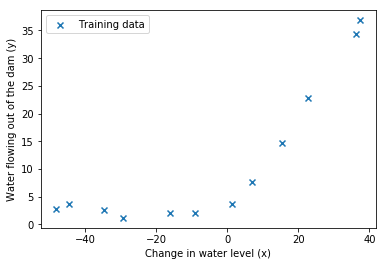

In [166]:
plot_data(X, y, 'Change in water level (x)', 'Water flowing out of the dam (y)')

### 1.2 Regularized linear regression cost function

In [167]:
def linear_reg_cost_function(theta, X, y, lamb=1):
    m = len(y)
    hx = X.dot(theta.reshape(-1,1))
    J = (1/(2*m))*(np.sum(np.square(hx-y))) + (lamb/(2*m))*(np.sum(np.square(theta[1:])))
    
    return J

In [168]:
def linear_reg_gradient(theta, X, y, lamb=1):
    m = len(y)
    hx = X.dot(theta.reshape(-1,1))
    grad = (1/m)*((hx-y).T.dot(X)) + (lamb/m)*(np.c_[[0],[theta[1:]]])
    
    return grad.flatten()

In [169]:
X_in = np.c_[np.ones((X.shape[0],1)), X]
theta_init = np.ones((X_in.shape[1]))

In [170]:
cost = linear_reg_cost_function(theta_init, X_in, y, 1)
grad = linear_reg_gradient(theta_init, X_in, y, 1)
print(cost)
print(grad)

303.9931922202643
[-15.30301567 598.25074417]


### 1.4 Fitting linear regression

In [171]:
def train_linear_reg(X, y, lamb):
    theta = np.ones((X.shape[1]))
    res = minimize(linear_reg_cost_function, theta, method='CG', args=(X,y,lamb), \
                   jac=linear_reg_gradient, options={'disp': False})
    
    return res.x

In [172]:
theta = train_linear_reg(X_in, y, 0)

In [173]:
def predict(theta, X):
    X_2d = X.reshape(-1,1)
    X_in = np.c_[np.ones((X_2d.shape[0],1)), X_2d]
    return X_in.dot(theta.reshape(-1,1)).flatten()

In [174]:
def plot_fit(theta, X, y):
    X_min, X_max = np.min(X), np.max(X)
    plot_X = np.linspace(X_min, X_max)
    plot_y = predict(theta, plot_X)
    plt.plot(plot_X, plot_y,label='Linear fit', color='r')
    plot_data(X, y, 'Change in water level (x)', 'Water flowing out of the dam (y)', plt.gca())

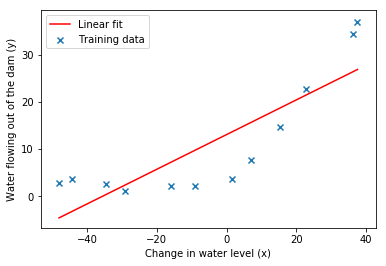

In [175]:
plot_fit(theta, X, y)

### 2.1 Learning curves

In [176]:
def evaluate(ground_truth, prediction):
    return np.mean(np.square(ground_truth.ravel() - prediction.ravel()))/2

In [177]:
def learning_curve(X, y, Xval, yval, lamb):
    m = len(y)
    error_train = []
    error_val = []
    for i in range(1, m):
        X_in = np.c_[np.ones((i, 1)), X[:i]]
        y_in = y[:i]
        theta = train_linear_reg(X_in, y_in, lamb)
        
        pred_train = predict(theta, X[:i])
        pred_val = predict(theta, Xval)

        error_train.append(evaluate(y_in, pred_train))
        error_val.append(evaluate(yval, pred_val))
        
    return error_train, error_val

In [178]:
error_train, error_val = learning_curve(X, y, Xval, yval, 1)

In [179]:
def plot_learning_curve(error_train, error_val, axes=None):
    if axes == None:
        axes = plt.gca()
        
    axes.plot(np.linspace(1, len(error_train), len(error_train)), error_train, label='Train')
    axes.plot(np.linspace(1, len(error_val), len(error_val)), error_val, label='Cross Validation')
    axes.set_xlabel('Number of training examples')
    axes.set_ylabel('Error')
    axes.legend()

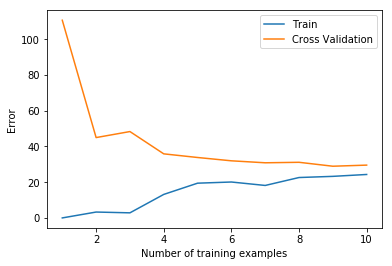

In [180]:
plot_learning_curve(error_train[1:], error_val[1:])

### 3 Polynomial regression

In [181]:
def poly_features(X, p):
    poly = PolynomialFeatures(p)
    return poly.fit_transform(X)

In [198]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma
    
    return X_norm, mu, sigma

In [199]:
def feature_normalize_with_params(X, mu, sigma):
    return (X - mu)/sigma

In [203]:
p = 8
X_poly = normalize(poly_features(X, p))
X_poly = np.c_[np.ones((X_poly.shape[0],1)), X_poly]

X_poly_test = normalize(poly_features(Xtest, p))
X_poly_test = np.c_[np.ones((X_poly_test.shape[0],1)), X_poly_test]

X_poly_val = normalize(poly_features(Xval, p))
X_poly_val = np.c_[np.ones((X_poly_val.shape[0],1)), X_poly_val]

### 3.1 Learning Polynomial Regression

In [204]:
theta_poly = train_linear_reg(X_poly, y, 0)

In [205]:
def plot_fit(min_x, max_x, mu, sigma, theta, p):
    x = np.linspace(min_x - 5, max_x + 5).reshape(-1,1)
    X_poly = normalize(poly_features(x, p))
    X_poly = np.c_[np.ones((X_poly.shape[0],1)), X_poly]
    plt.plot(x, X_poly.dot(theta), label='Poly fit, p = 8', color='r')
    plot_data(X, y, 'Change in water level (x)', 'Water flowing out of the dam (y)', plt.gca())

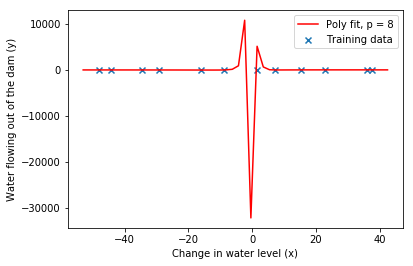

In [206]:
plot_fit(np.min(X), np.max(X), mu, sigma, theta_poly, p)